# App Rating Prediction Project

In [1]:
# Mir Al Sadi

# Issue

# 1) Loading Data

In [2]:
# using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set sns figsize to 15x8
sns.set(rc={'figure.figsize': (18, 9)})

In [4]:
# importing data
data=pd.read_csv('googleplaystore.csv')

In [5]:
# Checking to see if import succesfull
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Number of rows/columns
data.shape

(10841, 13)

# 2) Check for null values

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3) Dropping Null Values

In [8]:
# majority of null values are in the column 'Rating'. We will need to drop these, so:
data=data.dropna()

In [9]:
# Check to see if the null values have dropped:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4) Sorting Out Data Types

# Size Column

In [10]:
# Need to remove M, then covert to float by *1000 to K and then return value
# Second part of the code: changing to float for values already in k

In [11]:
def convert_size_to_float(size):
    if size[-1] == 'M':
        return float(size[:-1]) * 1000
    elif size[-1] == 'K':
        return float(size[:-1])
    else:
        return 0

# apply function to df size
data['Size'] = data['Size'].apply(convert_size_to_float)

In [12]:
#data['Size']=data['Size'].map(change)#

In [13]:
# Check above function worked:
data['Size'].value_counts()

0.0        1894
14000.0     165
12000.0     161
11000.0     159
15000.0     159
           ... 
89000.0       9
84000.0       9
86000.0       8
90000.0       5
1000.0        4
Name: Size, Length: 182, dtype: int64

# Reviews Column

In [14]:
# convert data reviews to float
data['Reviews'] = data['Reviews'].astype(float)

# Installs Column

In [15]:
# install field has a comma and + symbol - we cannot continue with these
# remove + and , from installs
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', ''))
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', ''))
# convert to int
data['Installs'] = data['Installs'].astype(int)

# Price Column

In [16]:
#convert Price into Float & removing $ symbol
data['Price'] = data['Price'].apply(lambda x: x.replace('$', ''))
# convert to float
data['Price'] = data['Price'].astype(float)

In [17]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 5) Sanity Checks

In [19]:
# Rating should be between 1 & 5;

In [20]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
data[data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [22]:
# Dropping rows where reviews are greater than installs

In [23]:
data['Installs']=data['Installs'].astype('int')
data[data['Reviews']>data['Installs']]
# 7 rows found

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,0.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [24]:
# dropping the above 7 
#data.drop(data[data['Reviews'] > data['Installs']].index, inplace = True)#
data = data[data['Reviews'] <= data['Installs']]

In [25]:
#Dropping any 

In [26]:
wrong_rows = data[(data['Type'] == 'Free') & (data['Price'] != 0)]
data = data.drop(wrong_rows.index)

# 6) Univariate Analysis

# Boxplots

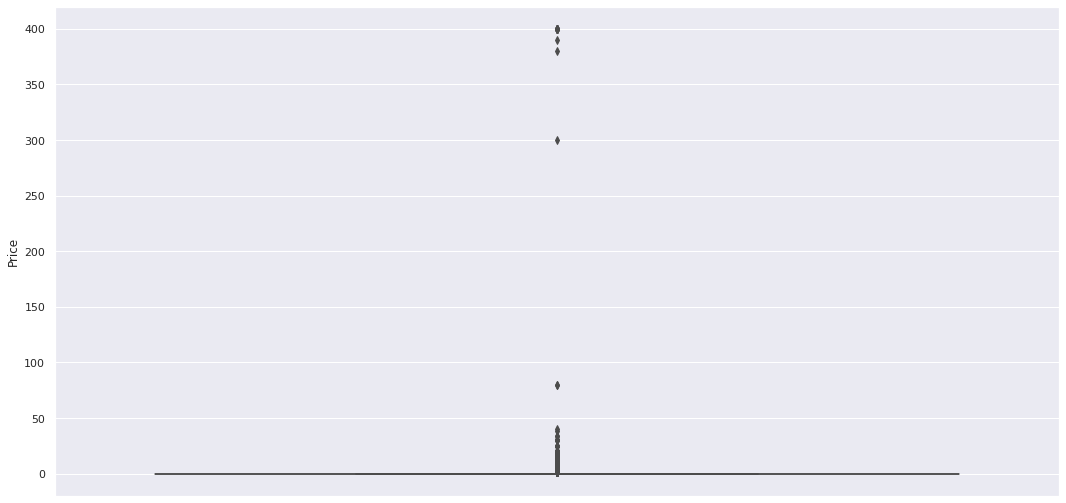

In [27]:
# Boxplot for Price
sns.boxplot(y='Price', data=data)
plt.show()

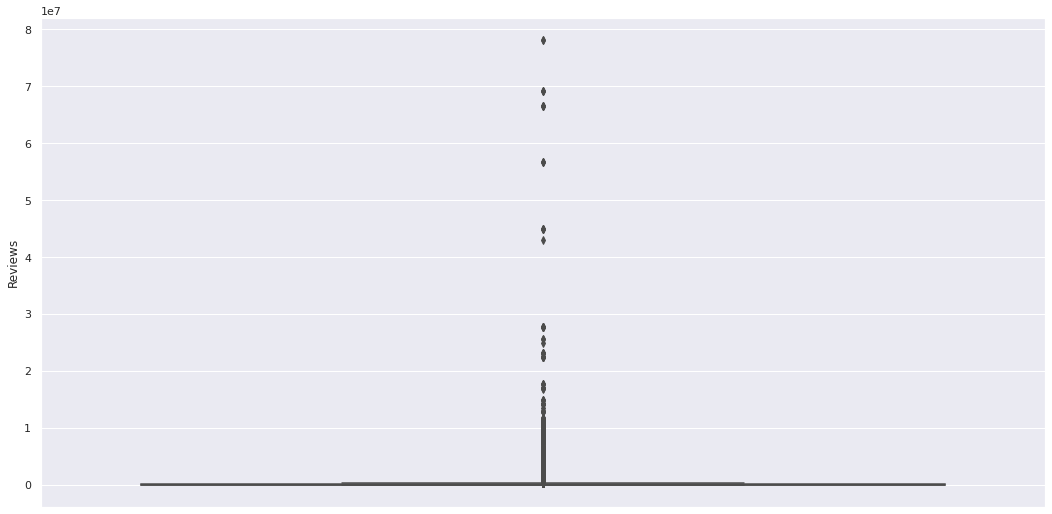

In [28]:
# Box plot for reviews
sns.boxplot(y='Reviews', data=data)
plt.show()

# Histograms

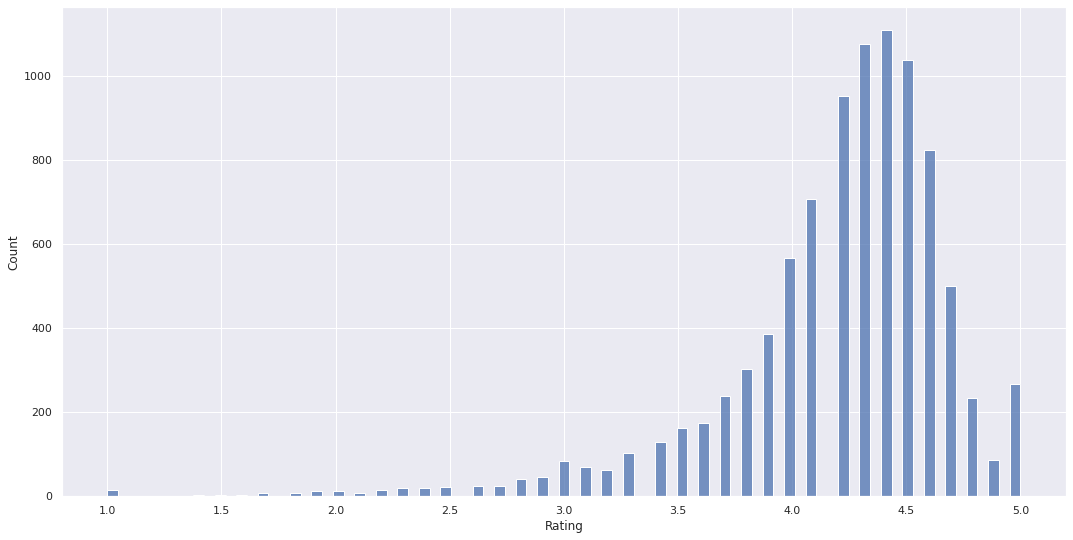

In [29]:
# Histogram for rating
sns.histplot(data['Rating'])
plt.show()

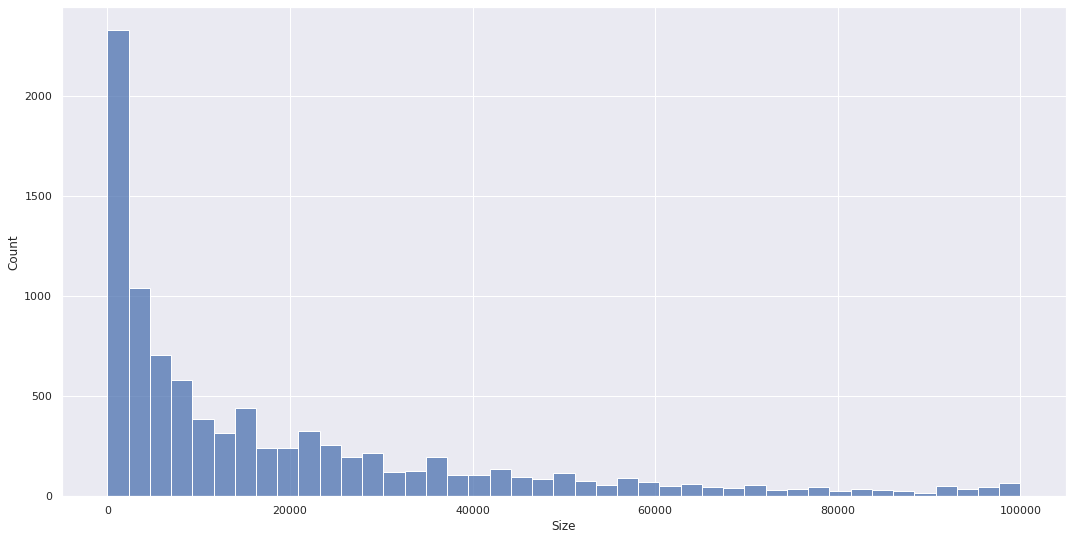

In [30]:
# Histogram for size
sns.histplot(data['Size'])
plt.show()

# 7) Outlier Treatment

# Price

In [31]:
# Rows where price > 200, sort by price
data[data['Price'] > 200].sort_values(by='Price')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5366,I Am Rich,FAMILY,3.6,217.0,4900.0,10000,Paid,389.99,Everyone,Entertainment,"June 22, 2018",1.5,4.2 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [32]:
# Drop rows where price > 200
data = data[data['Price'] <= 200]
print("Success")

Success


# Reviews

In [33]:
# drop rows where reviews > 2million
data = data[data['Reviews'] <= 2000000]
print("Success")

Success


# Installs

In [34]:
# Quantiles of installs [10, 25, 50, 70, 90, 95, 99]
data['Installs'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [35]:
# Drop rows where installs > 10000000.0
data = data[data['Installs'] <= 10000000.0]

# 8) Bivariate Analysis

# Rating vs Price

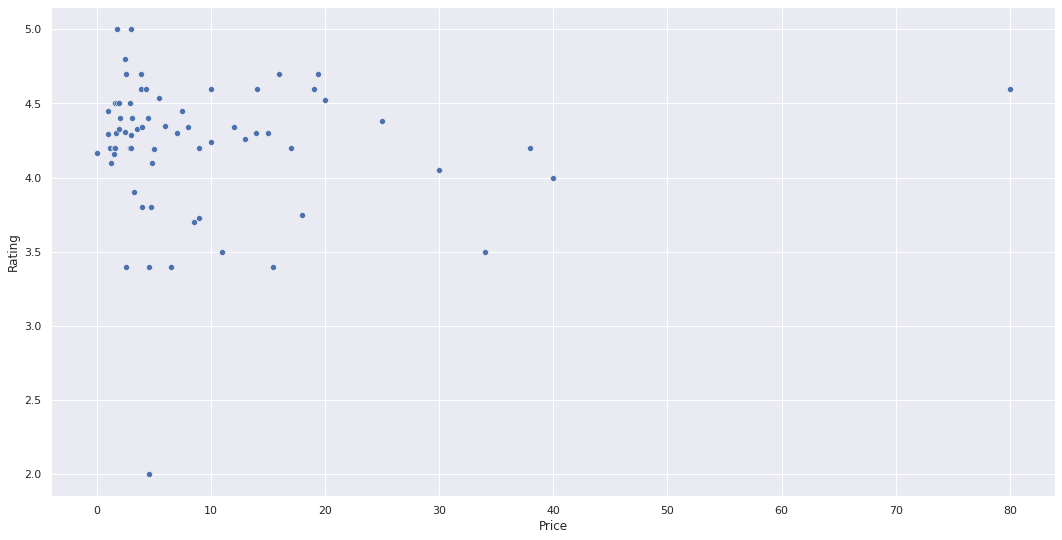

In [36]:
# Rating vs Price Scatter Plot
rating_vs_price = data[['Rating', 'Price']].groupby('Price').mean().reset_index()
# scatterplot
sns.scatterplot(x='Price', y='Rating', data=rating_vs_price)
plt.show()

# Rating vs Size

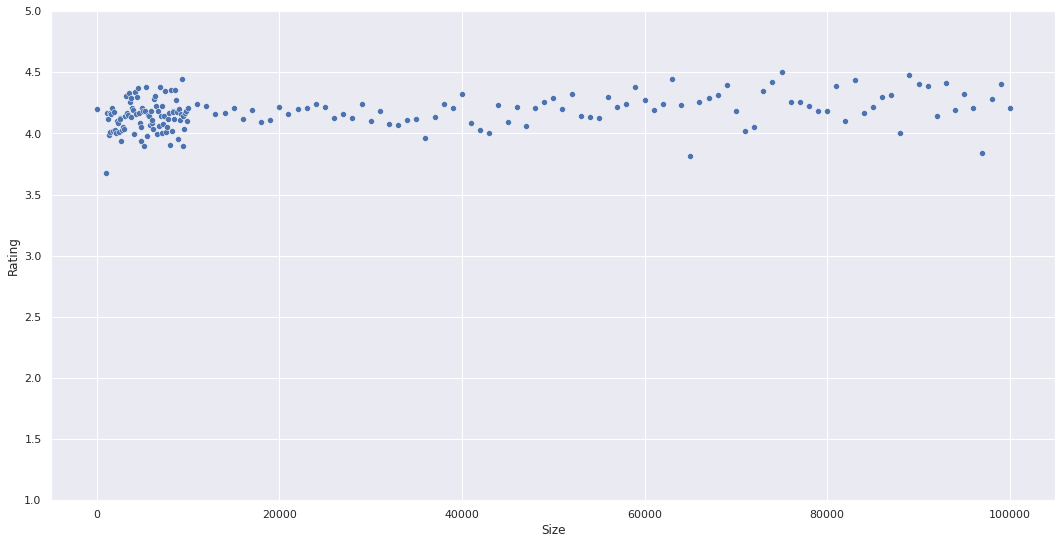

In [37]:
rating_vs_size = data[['Rating', 'Size']].groupby('Size').mean().reset_index()
# create scatterplot
fig = sns.scatterplot(x='Size', y='Rating', data=rating_vs_size)
# change y axis range to 1, 5
plt.ylim(1, 5)
fig
plt.show()

# Rating vs Content Rating

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

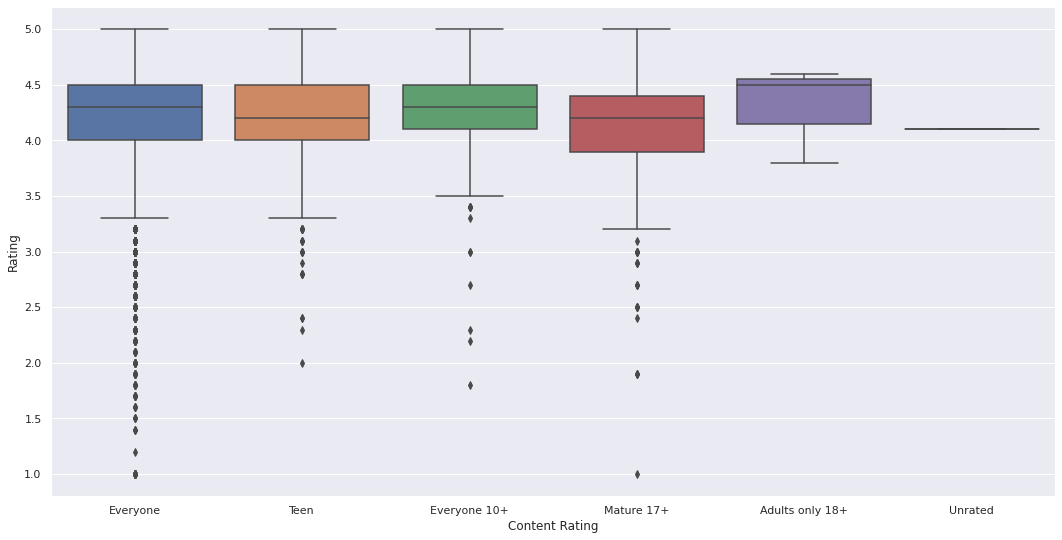

In [38]:
sns.boxplot('Content Rating','Rating',data=data)

# Ratings vs Category

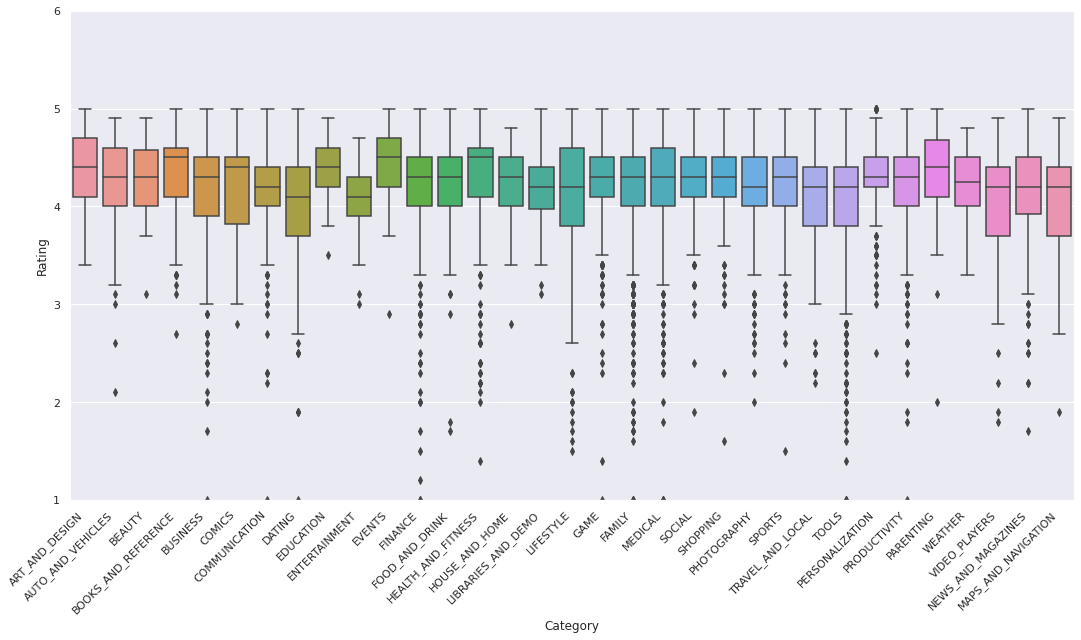

In [39]:
rating_vs_category = data[['Rating', 'Category']]

#ylim 1, 6
plt.ylim(1, 6)

# rotate x axis labels
plt.xticks(rotation=45, ha='right')

# Boxplot
plot = sns.boxplot(y='Rating', x='Category', data=rating_vs_category)
plt.show()

In [40]:
# Retrieve Category with the highest Mean Rating

print("Highest Mean", rating_vs_category.groupby('Category').mean()['Rating'].idxmax())

Highest Mean EVENTS


In [41]:
# Retrieve Category with the highest Median Rating

print("Highest Median", rating_vs_category.groupby('Category').median()['Rating'].idxmax())

Highest Median BOOKS_AND_REFERENCE


# 9) Data Preprocessing

In [42]:
# Creating a copy of the data set
inp1 = data.copy()

In [43]:
#Applying Log Transformation to reviews and installs (log1p)
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

# Dropping Columns

In [44]:
inp1 = inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver',], axis=1)

# Dummy Columns

In [45]:
# Creating dummy columns for category, genre and content rating, type
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating', 'Type'])

# 10) Splitting into Train and Test

In [49]:
from sklearn.model_selection import train_test_split

# select rating
y_data = inp2['Rating']
# all except rating
X_data = inp2.drop('Rating', axis=1)

# split data to train and test ration 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=100)

# 11) Building the Model

In [50]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# r2 of train set
print("R2 Train", lr.score(X_train, y_train))

R2 Train 0.16124508351179523


In [51]:
y_pred = lr.predict(X_test)
print(y_pred)

[4.15799215 4.18459295 4.13469052 ... 4.34412421 3.94556886 4.08988851]
